# Misclassified images

In [2]:
from models import ClassificationModel

In [3]:
from datasets import Hotdog_NotHotdog
from networks import ResNet18Binary
from torch.utils.data import DataLoader
import torch

In [4]:
network = ResNet18Binary()
model = ClassificationModel.load_from_checkpoint("lightning_logs/epoch=41-step=1302.ckpt", network=network)

c:\Users\gusta\miniconda3\envs\bachelor\Lib\site-packages\pytorch_lightning\utilities\migration\utils.py:56: The loaded checkpoint was produced with Lightning v2.5.5, which is newer than your current Lightning version: v2.4.0


In [5]:
dataset = Hotdog_NotHotdog(train=False, image_size=128)
dataloader = DataLoader(dataset, batch_size=1862, shuffle=True)
model.eval()
batch = next(iter(dataloader))
with torch.no_grad():
    images, labels = batch['input'], batch['target']
    outputs = model.classify(images)



In [6]:
print(f"outputs: {outputs.flatten()}, \n labels: {labels}")

outputs: tensor([0, 0, 0,  ..., 1, 1, 1]), 
 labels: tensor([0, 0, 0,  ..., 0, 1, 1])


# Investigation of which images were misclassified by the model on the test set.


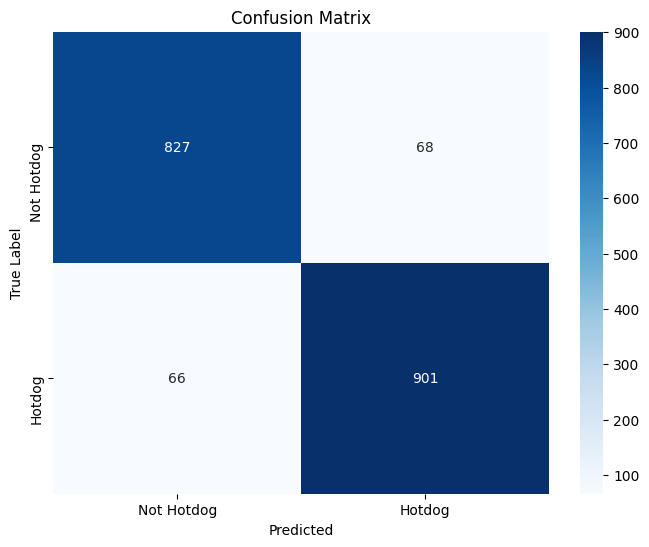

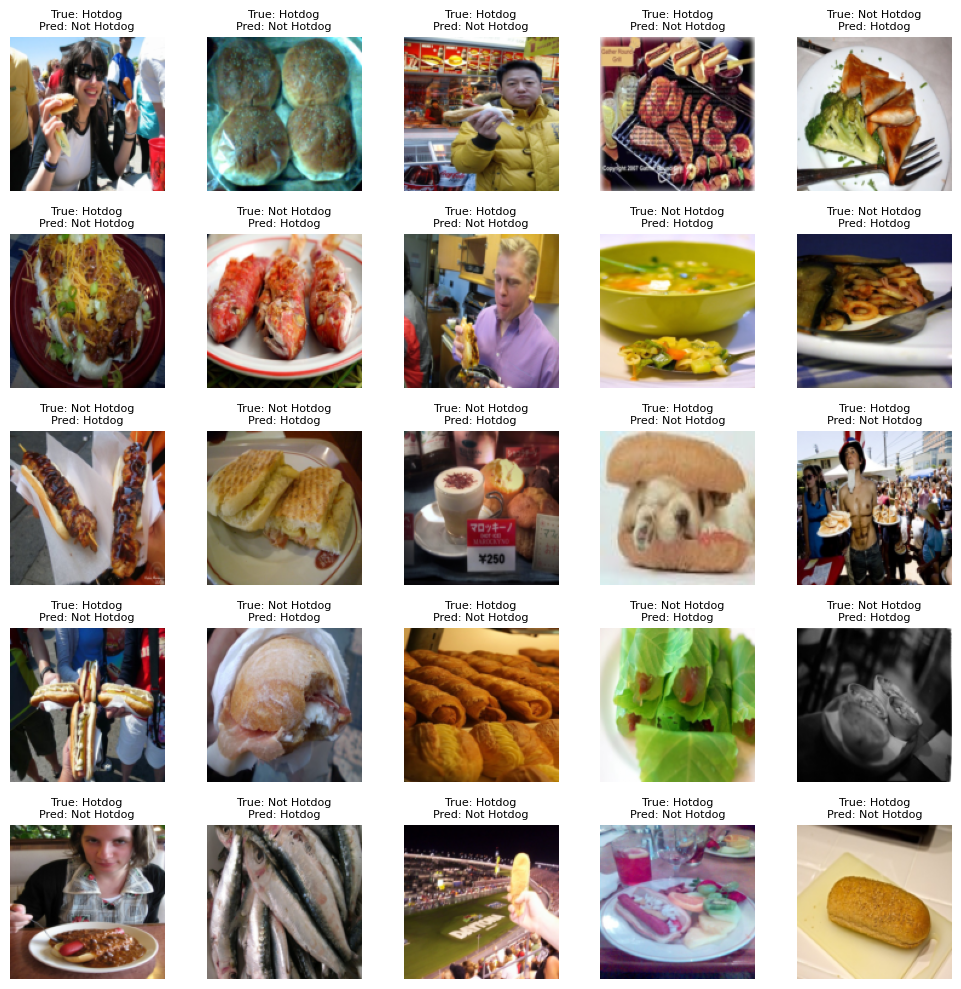

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
preds = (outputs.flatten() > 0.5).int()
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hotdog', 'Hotdog'], yticklabels=['Not Hotdog', 'Hotdog'])
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Identify misclassified images
misclassified_indices = (preds != labels).nonzero(as_tuple=True)[0]
misclassified_images = images[misclassified_indices]

# Plot some of the misclassified images
num_to_plot = min(25, len(misclassified_images))
plt.figure(figsize=(10,10))
for i in range(num_to_plot):
    plt.subplot(5, 5, i+1)
    img = misclassified_images[i].permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    plt.imshow(img)
    plt.axis('off')
    true_label = 'Not Hotdog' if labels[misclassified_indices[i]] == 1 else 'Hotdog'
    pred_label = 'Hotdog' if preds[misclassified_indices[i]] == 0 else 'Not Hotdog'
    plt.title(f'True: {true_label}\nPred: {pred_label}', fontsize=8)
plt.tight_layout()  
plt.show()


# Further statistical analysis


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(labels, preds)
recall = recall_score(labels, preds)    
f1 = f1_score(labels, preds)
roc_auc = roc_auc_score(labels, outputs.flatten().cpu())
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")





Precision: 0.9298, Recall: 0.9317, F1-score: 0.9308, ROC-AUC: 0.9279
